In [2]:
import pandas as pd

train_df = pd.read_csv("./data/rainfall_train.csv")
test_df = pd.read_csv("./data/rainfall_test.csv")

train_df = train_df.drop(columns=['Unnamed: 0', 'rainfall_train.fc_year', 'rainfall_train.fc_month',
       'rainfall_train.fc_day', 'rainfall_train.fc_hour'])
test_df = test_df.drop(columns=['Unnamed: 0', 'rainfall_test.fc_year', 'rainfall_test.fc_month',
       'rainfall_test.fc_day', 'rainfall_test.fc_hour'])

## 학습/테스트 데이터 시간/공간적 범위 분석

### 시간적 범위 분석

**년도(rainfall_ef_year)**

In [3]:
train_df["rainfall_train.ef_year"].unique()

array(['A', 'B', 'C'], dtype=object)

In [4]:
test_df["rainfall_test.ef_year"].unique()

array(['D'], dtype=object)

### 공간적 범위 분석


**지점(rainfall_train.stn4contest)**

In [5]:
train_df["rainfall_train.stn4contest"].unique()

array(['STN001', 'STN002', 'STN003', 'STN004', 'STN005', 'STN006',
       'STN007', 'STN008', 'STN009', 'STN010', 'STN011', 'STN012',
       'STN013', 'STN014', 'STN015', 'STN016', 'STN017', 'STN018',
       'STN019', 'STN020'], dtype=object)

In [6]:
test_df["rainfall_test.stn4contest"].unique()

array(['STN031', 'STN032', 'STN033', 'STN034', 'STN035'], dtype=object)

## 년도/지점이 주는 영향도 분석


### 지점별 실 강수량 평균값


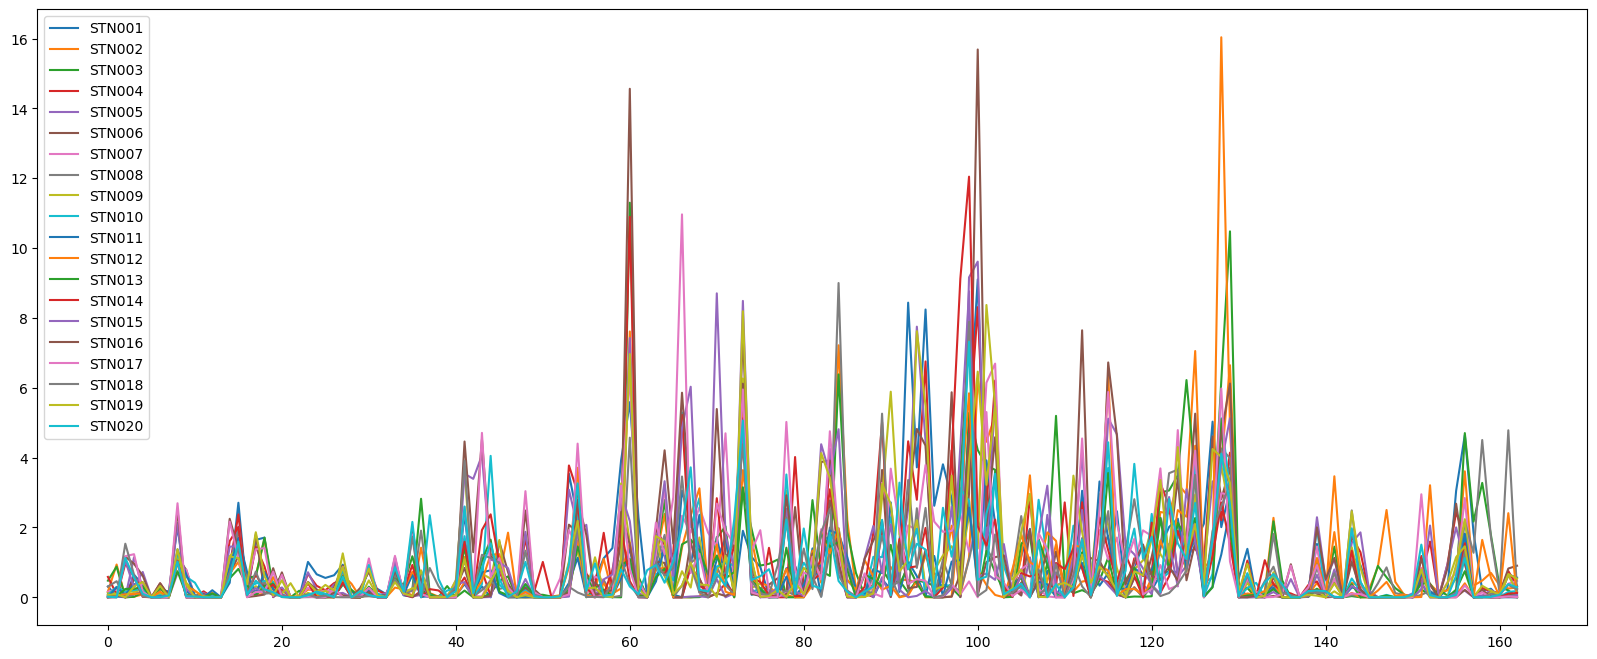

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
train_df = train_df[~(train_df["rainfall_train.vv"] == -999)]
for stn in train_df["rainfall_train.stn4contest"].unique():
    plt.plot(train_df[train_df["rainfall_train.stn4contest"] == stn].groupby(["rainfall_train.ef_month","rainfall_train.ef_day"])["rainfall_train.vv"].mean().reset_index()["rainfall_train.vv"],label=stn)
plt.legend()

### 년도별 실강수량 평균값

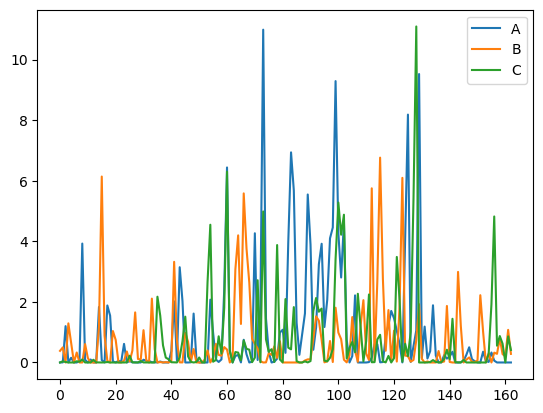

In [8]:
for y in train_df["rainfall_train.ef_year"].unique():
    plt.plot(train_df[train_df["rainfall_train.ef_year"] == y].groupby(["rainfall_train.ef_month","rainfall_train.ef_day"])["rainfall_train.vv"].mean().reset_index()["rainfall_train.vv"],label=y)
plt.legend()

## 클래스 계급별 데이터 분포

### 전체 계급별 데이터 분포

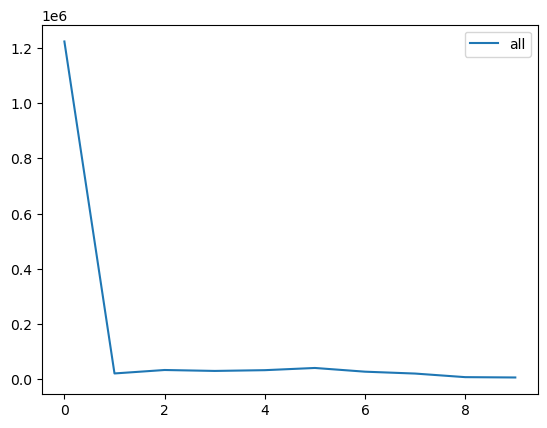

In [9]:
plt.plot(train_df.groupby(["rainfall_train.class_interval"])[["rainfall_train.class_interval"]].count().reset_index(drop=True), label="all")
plt.legend()

### 년도별 강수계급 데이터 분포 

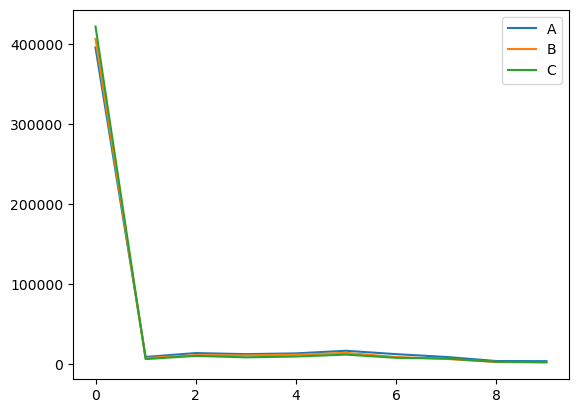

In [11]:
tmp_data = pd.concat([train_df[train_df["rainfall_train.ef_year"] == "A"].groupby(["rainfall_train.class_interval"])[["rainfall_train.class_interval"]].count().reset_index(drop=True),train_df[train_df["rainfall_train.ef_year"] == "B"].groupby(["rainfall_train.class_interval"])[["rainfall_train.class_interval"]].count().reset_index(drop=True),train_df[train_df["rainfall_train.ef_year"] == "C"].groupby(["rainfall_train.class_interval"])[["rainfall_train.class_interval"]].count().reset_index(drop=True)],axis=1)
tmp_data.columns = ["A","B","C"]

for i in tmp_data.columns:
    plt.plot(tmp_data[i],label=i)
plt.legend()


### 지점별 강수 계급 데이터 분포

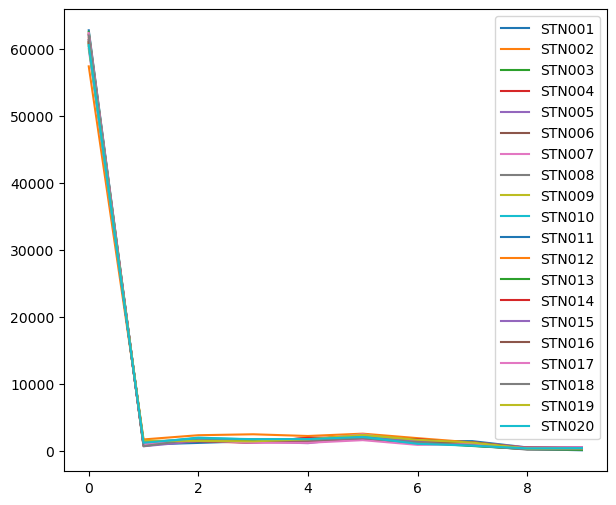

In [12]:
plt.figure(figsize=(7,6))

stn_data = pd.DataFrame()
for stn in train_df["rainfall_train.stn4contest"].unique():
    stn_data = pd.concat([stn_data, train_df[train_df["rainfall_train.stn4contest"] == stn].groupby(by="rainfall_train.class_interval")[["rainfall_train.class_interval"]].count().reset_index(drop=True)],axis=1)
stn_data.columns = [i for i in train_df["rainfall_train.stn4contest"].unique()]

for stn in stn_data.columns:
    plt.plot(stn_data[stn], label=stn)
plt.legend()


### 무강수/강수 데이터 분포도

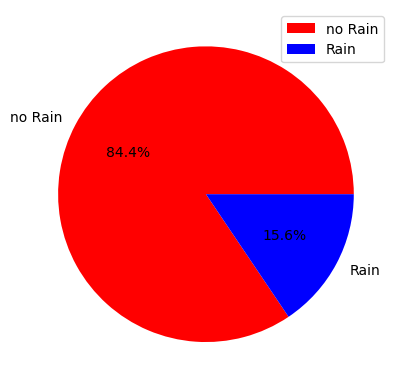

In [18]:
data = [train_df[train_df["rainfall_train.class_interval"] == 0]["rainfall_train.class_interval"].count(), train_df[train_df["rainfall_train.class_interval"] != 0]["rainfall_train.class_interval"].count()]
plt.pie(data, colors=["#FF0000","#0000FF"], labels=["no Rain", "Rain"], autopct="%1.1f%%")
plt.legend()


### 강수 클래스 계급별 데이터 분포

**전체 데이터 분포**

([<matplotlib.patches.Wedge at 0x2e9b446ab80>,
 [Text(1.0507187365510533, 0.32556126406647096, 'V01'),
  Text(0.5228491140931715, 0.9677958482510586, 'V02'),
  Text(-0.4353484045051672, 1.0101840261530597, 'V03'),
  Text(-1.060032376729557, 0.293821987409191, 'V04'),
  Text(-0.787850700656545, -0.7676530944866901, 'V05'),
  Text(0.18425660630436277, -1.084458161033979, 'V06'),
  Text(0.8285474807777654, -0.723539267833349, 'V07'),
  Text(1.0479740324630202, -0.3342909320983698, 'V08'),
  Text(1.0947918059106916, -0.10691539510663098, 'V09')],
 [Text(0.573119310846029, 0.17757887130898414, '9.6%'),
  Text(0.28519042586900256, 0.5278886445005774, '15.1%'),
  Text(-0.23746276609372755, 0.5510094688107597, '13.6%'),
  Text(-0.5781994782161219, 0.16026653858683143, '14.8%'),
  Text(-0.4297367458126609, -0.4187198697200127, '18.4%'),
  Text(0.10050360343874332, -0.5915226332912612, '12.4%'),
  Text(0.45193498951514466, -0.39465778245455396, '9.4%'),
  Text(0.5716221995252837, -0.182340508417

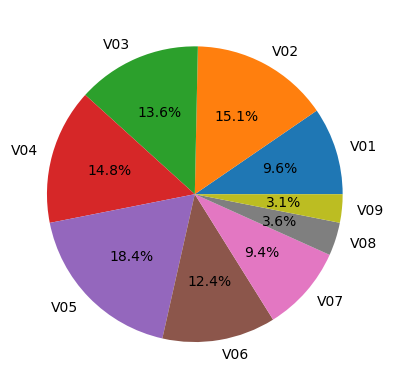

In [40]:
rainfall_train = train_df[train_df["rainfall_train.class_interval"] !=0]

plt.pie(rainfall_train.groupby("rainfall_train.class_interval")["rainfall_train.class_interval"].count(),labels=[ "V{:02d}".format(i) for i in range(1,10)], autopct="%1.1f%%")

**지점별 데이터 분포**

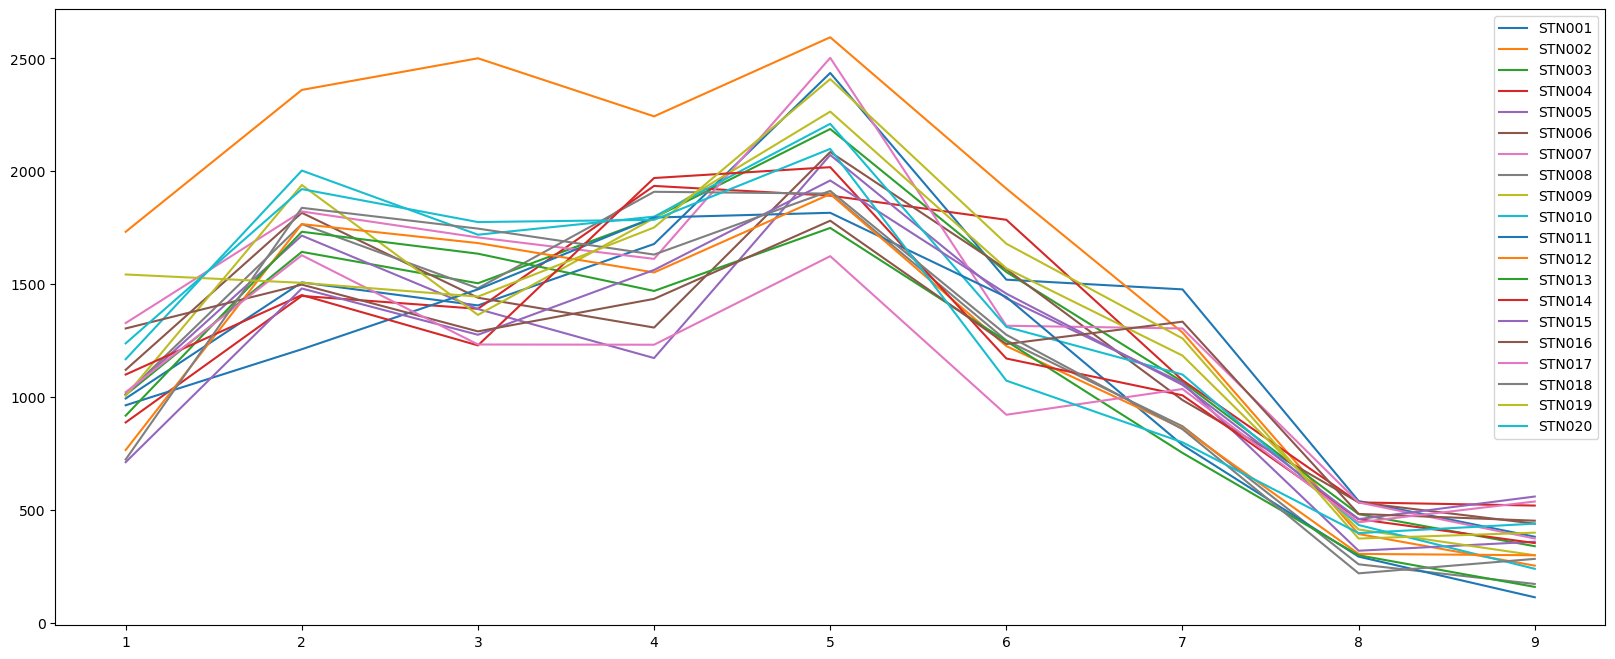

In [44]:
plt.figure(figsize=(20,8))
for stn in rainfall_train["rainfall_train.stn4contest"].unique():
    plt.plot(rainfall_train[rainfall_train["rainfall_train.stn4contest"] == stn].groupby("rainfall_train.class_interval")["rainfall_train.class_interval"].count(),label=stn)
plt.legend()

**년도별 데이터 분포**

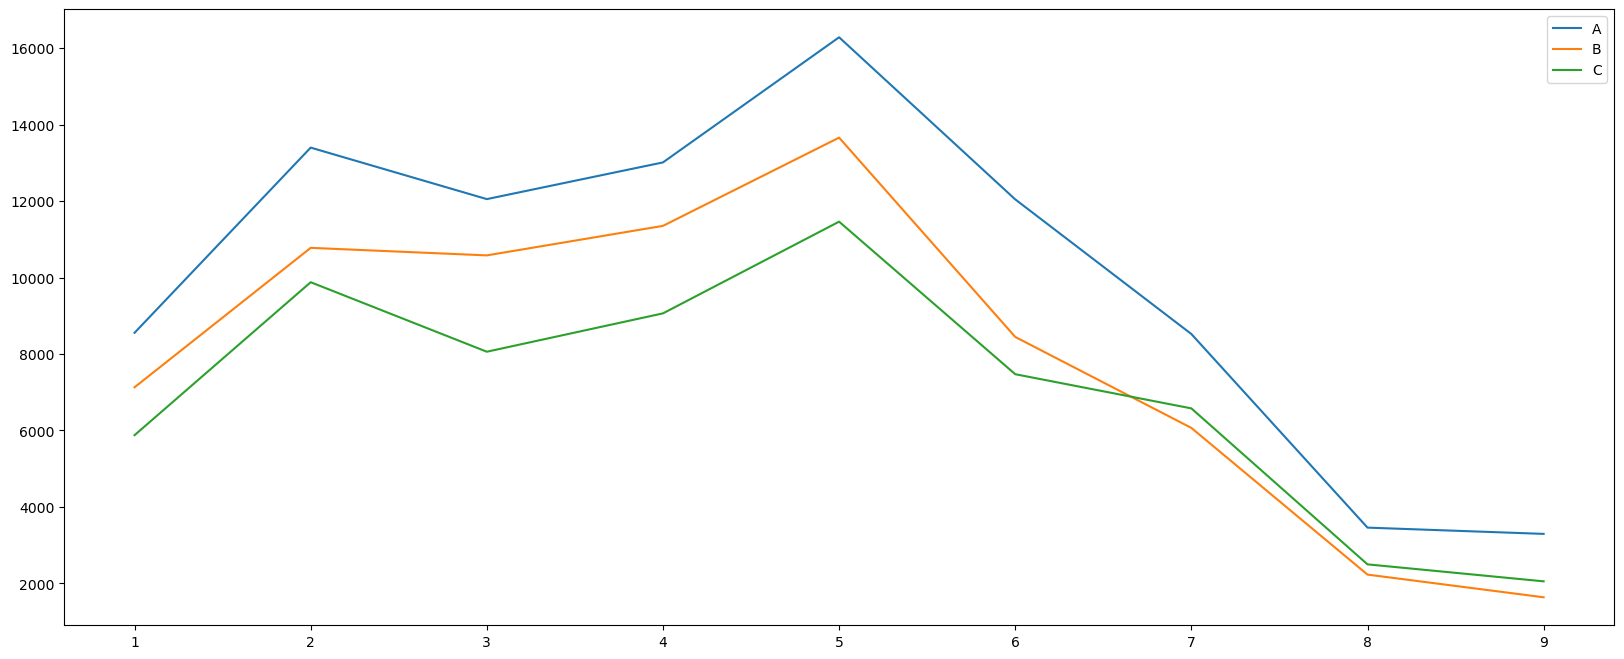

In [46]:
plt.figure(figsize=(20,8))
for y in rainfall_train["rainfall_train.ef_year"].unique():
    plt.plot(rainfall_train[rainfall_train["rainfall_train.ef_year"] == y].groupby("rainfall_train.class_interval")["rainfall_train.class_interval"].count(),label=y)
plt.legend()

**지점/년도별 강수 데이터 분포**

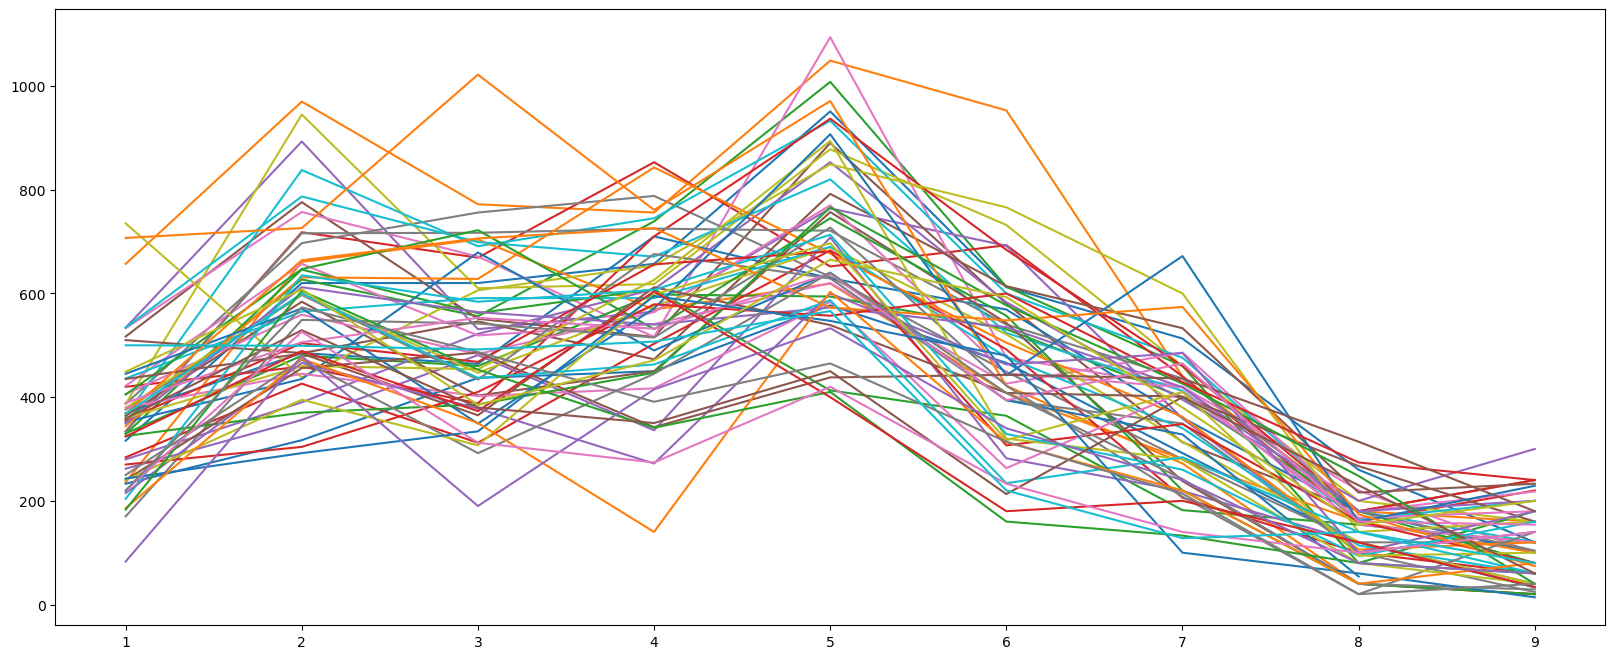

In [49]:
plt.figure(figsize=(20,8))
for y in rainfall_train["rainfall_train.ef_year"].unique():
    for stn in rainfall_train["rainfall_train.stn4contest"].unique():
        plt.plot(rainfall_train[(rainfall_train["rainfall_train.ef_year"] == y) & (rainfall_train["rainfall_train.stn4contest"] == stn)].groupby("rainfall_train.class_interval")["rainfall_train.class_interval"].count(),label=" ".join([y,stn]))

**각각의 확률분포에 따라서 강수량 수치 계산: 각 계급별 중간 값 * 확률변수**
- 'rainfall_train.v01' : 0.1 -0.2  (mm)
- 'rainfall_train.v02' : 0.2 -0.5  (mm)
- 'rainfall_train.v03' : 0.5 -1.0  (mm)
- 'rainfall_train.v04' : 1.0 -2.0  (mm)
- 'rainfall_train.v05' : 2.0 -5.0  (mm)
- 'rainfall_train.v06' : 5.0 -10.0 (mm)
- 'rainfall_train.v07' : 10.0-20.0 (mm)
- 'rainfall_train.v08' : 20.0-30.0 (mm)
- 'rainfall_train.v09' : 30.0      (mm)

각각의 계급별 중간 값에 따라